In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [3]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

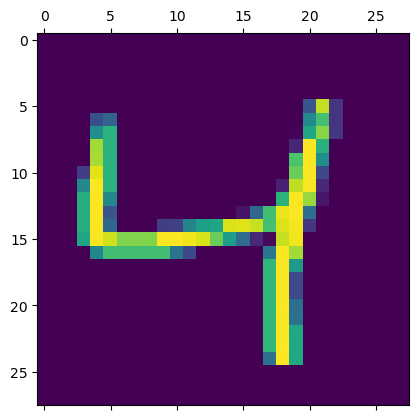

In [4]:
plt.matshow(X_train[2])

In [5]:
y_train[2]

4

In [6]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
X_train_flattened.shape

(60000, 784)

In [19]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [20]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [21]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])



In [22]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [23]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 863us/step - loss: 0.4666 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 2s 854us/step - loss: 0.3032 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 812us/step - loss: 0.2829 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 1s 796us/step - loss: 0.2727 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 871us/step - loss: 0.2663 - accuracy: 0.9262


In [24]:
model.evaluate (X_test_flattened, y_test)

313/313 [==============================] - 0s 704us/step - loss: 0.2722 - accuracy: 0.9231


[0.2721650302410126, 0.9230999946594238]

In [25]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 653us/step


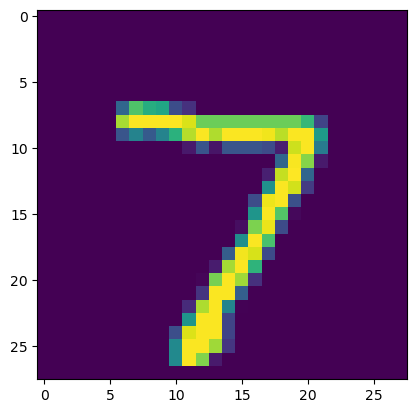

In [26]:
plt.imshow(X_test[0])

In [29]:
y_predicted[1]

array([5.4622948e-01, 5.7639563e-03, 9.9947751e-01, 4.6372965e-01,
       8.0779849e-10, 8.1674194e-01, 9.3447930e-01, 1.1955651e-12,
       1.3432053e-01, 1.6496070e-09], dtype=float32)

In [31]:
np.argmax(y_predicted[1])

2

In [32]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [34]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   9,   10,  907,   20,    9,    3,   13,   11,   46,    4],
       [   4,    0,   11,  935,    0,   16,    4,   11,   23,    6],
       [   2,    1,    2,    1,  914,    0,   12,    5,    9,   36],
       [  11,    3,    2,   43,   10,  761,   21,    6,   29,    6],
       [  10,    3,    3,    1,    7,    7,  924,    2,    1,    0],
       [   1,    6,   21,    8,    7,    1,    0,  953,    2,   29],
       [   8,    8,    6,   31,    9,   30,   10,   12,  854,    6],
       [  11,    7,    1,   12,   29,    7,    0,   28,    5,  909]])>

Text(95.72222222222221, 0.5, 'Truth')

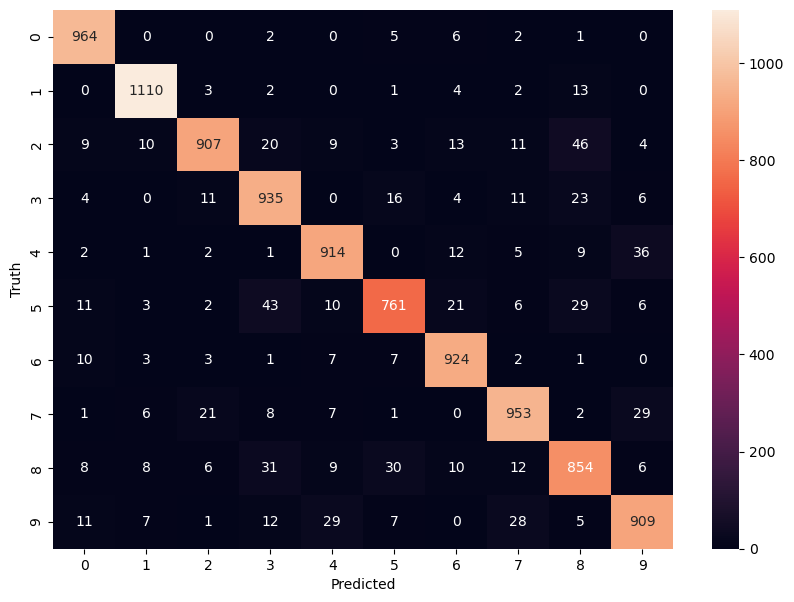

In [36]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Another way no need to flattened

In [40]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2683 - accuracy: 0.9225
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1186 - accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0822 - accuracy: 0.9756
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0637 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0500 - accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0412 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0333 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0288 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0225 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.019

In [41]:
model.evaluate (X_test, y_test)

313/313 [==============================] - 0s 955us/step - loss: 0.0770 - accuracy: 0.9778


[0.07701224088668823, 0.9778000116348267]

In [42]:
y_predicted = model.predict(X_test)

313/313 [==============================] - 0s 855us/step


In [44]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

Text(95.72222222222221, 0.5, 'Truth')

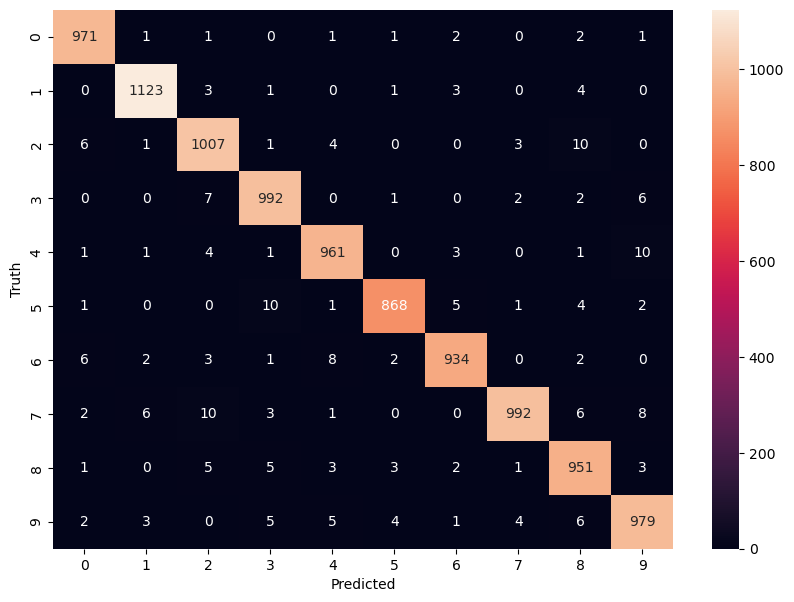

In [45]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')